In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=r"C:\Users\jeesh\OneDrive\Documents\NARESHIT\DATA FILES\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**steps in outlier analysis**

In [4]:
#step-1
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#step-2
IQR=Q3-Q1

#step-3
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

#step-4
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

#step-5
outliers=visa_df[con]
outliers

#step-6
c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2
non_outliers_df=visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**compare original data with non outliers data**

In [5]:
#will plot histogram and box plot of the both

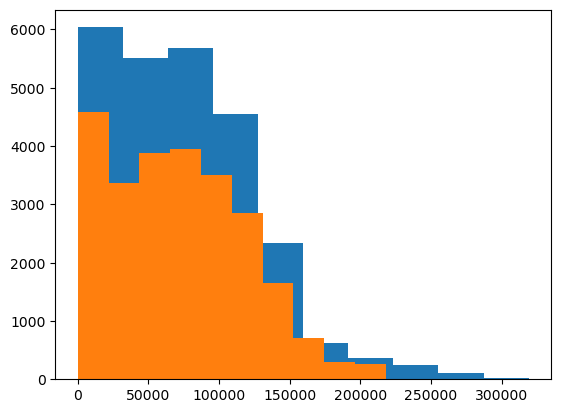

In [6]:
plt.hist(visa_df["prevailing_wage"])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

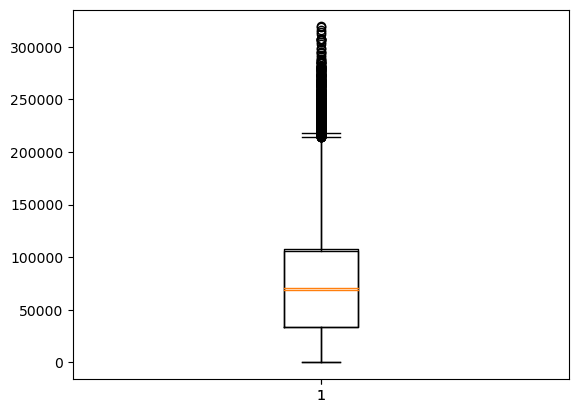

In [7]:
plt.boxplot(visa_df["prevailing_wage"])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

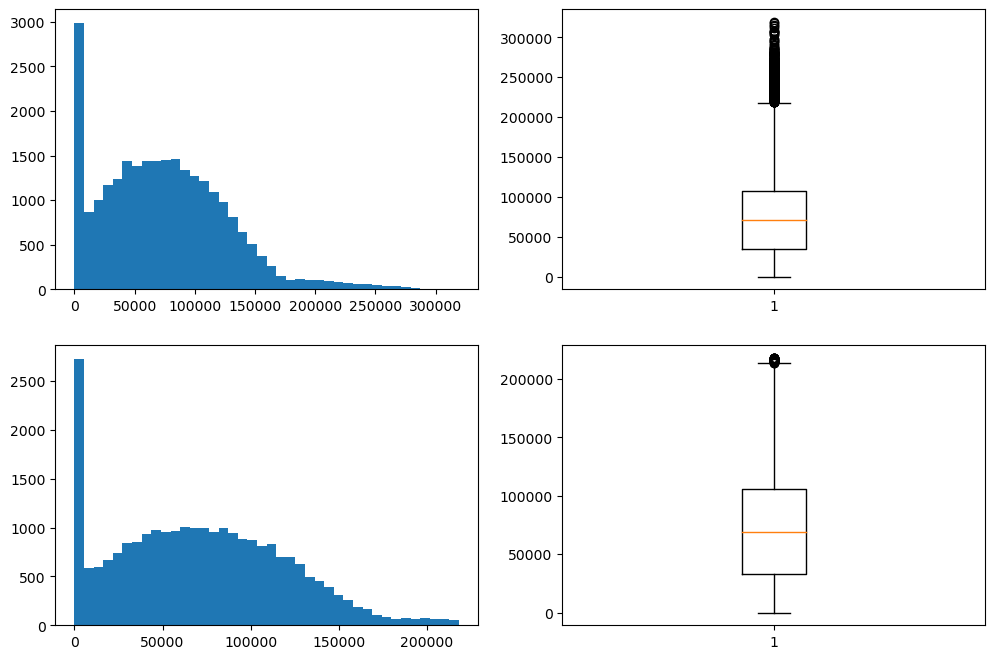

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

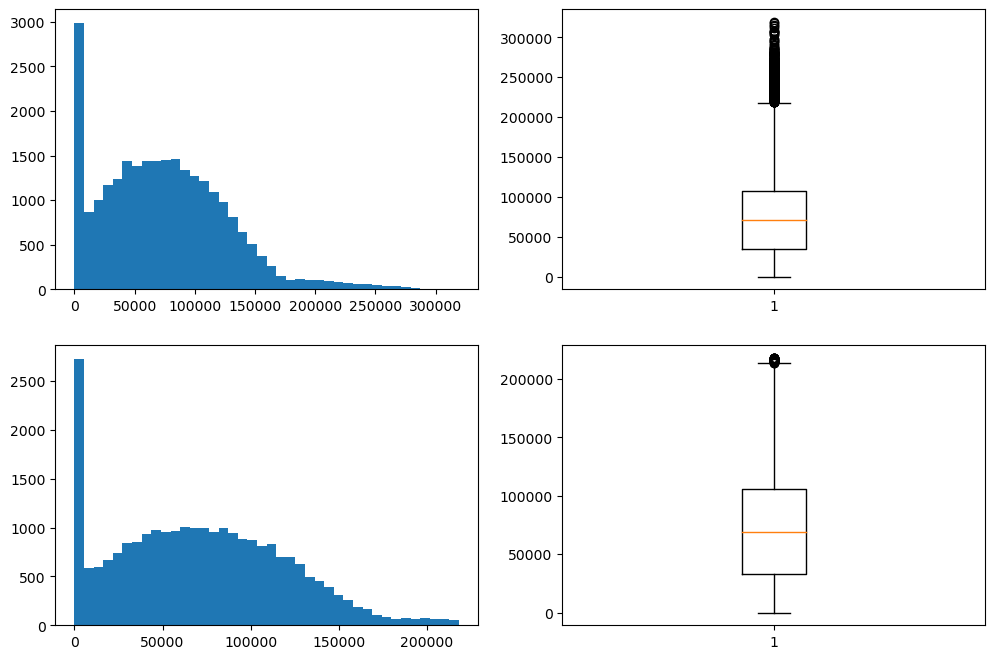

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.show()

# **how to deal outliers**

In [13]:
l=[]
median= visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        l.append(median)
    else:
        l.append(i)
len(l)

25480